In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
### Paths
exp1 = '/Users/sunjaeshim/Desktop/HonorsResearch2022/Exp 1/data/BIDS'

1. Classify within or between
2. Get present phase accuracy
3. Get order phase accuracy (by segment condition)

In [3]:
def count_corr(df, index_range):
    within_corr = 0
    within_count = 0
    between_corr = 0
    between_count = 0
    item_a = df['item_a'].dropna().to_list()
    item_b = df['item_b'].dropna().to_list()
    corr = df['key_resp_2.corr'].dropna().to_list()
    df = df[['pictures', 'segment']].dropna()
    for n in index_range:
        item_a_seg = df.loc[df['pictures']==item_a[n]]['segment'].to_list()[0]
        item_b_seg = df.loc[df['pictures']==item_b[n]]['segment'].to_list()[0]
        if item_a_seg == item_b_seg:
            within_count += 1
            within_corr  += corr[n]
        else:
            between_count += 1 
            between_corr += corr[n]
    return within_count, within_corr, between_count, between_corr

In [4]:
def segment_classification(f_name):
    task = f_name.split('_')[1]
    first = task.split('W')[0].replace('task-', '')
    second = task.split('W')[1]
    conds = {}
    df = pd.read_csv(f_name)
    conds[first] = count_corr(df, range(36))
    conds[second] = count_corr(df, range(36,72))
    return conds

In [5]:
exp1_data = glob.glob(exp1+'/*.csv')
noclock_within = []
noclock_between = []
clock_within = []
clock_between = []
for file in exp1_data:
    #condition_index_split(file)
    conds = segment_classification(file) 
    noclock_within.append(conds['noclock'][1]/conds['noclock'][0])
    noclock_between.append(conds['noclock'][3]/conds['noclock'][2])
    clock_within.append(conds['clock'][1]/conds['clock'][0])
    clock_between.append(conds['clock'][3]/conds['clock'][2])

In [6]:
noclock_within_acc = sum(noclock_within)/len(noclock_within)
noclock_between_acc = sum(noclock_between)/len(noclock_between)
clock_within_acc = sum(clock_within) / len(clock_within)
clock_between_acc = sum(clock_between) / len(clock_between)

<BarContainer object of 4 artists>

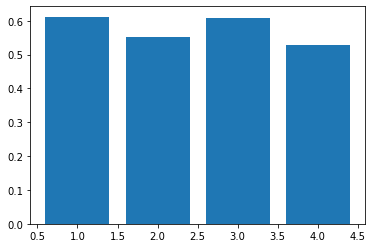

In [7]:
plt.bar([1,2,3,4],[noclock_within_acc, noclock_between_acc, clock_within_acc, clock_between_acc])